In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Step 1 Reading and Understanding The Data


In [4]:

df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Getting Shape, Info and Describe The columns of Data Frame
df.shape

(730, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking for the Null Values In Data Frame
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Renaming The Few Columns
df.rename(columns = {'yr':'year', 'mnth': 'month', 'hum':'humidity'},inplace=True)

In [10]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Copying the Dataframe into new and dropping duplicates 
# If The shape of copying data is same after dropping duplicates then that means there is no duplicates in original dataframne
df_copy = df.copy()


In [12]:
df_copy.shape

(730, 16)

In [13]:
# Dropping the Duplicates
df_copy.drop_duplicates(inplace=True)

In [14]:
df_copy.shape

(730, 16)

In [15]:
# Dropping Unwanted Columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [16]:
# mapping the season column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
# mapping the month column
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [18]:
# mapping the weekday column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [19]:
# mapping the weathersitcolumn
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [20]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step 2 Visualizing the Data

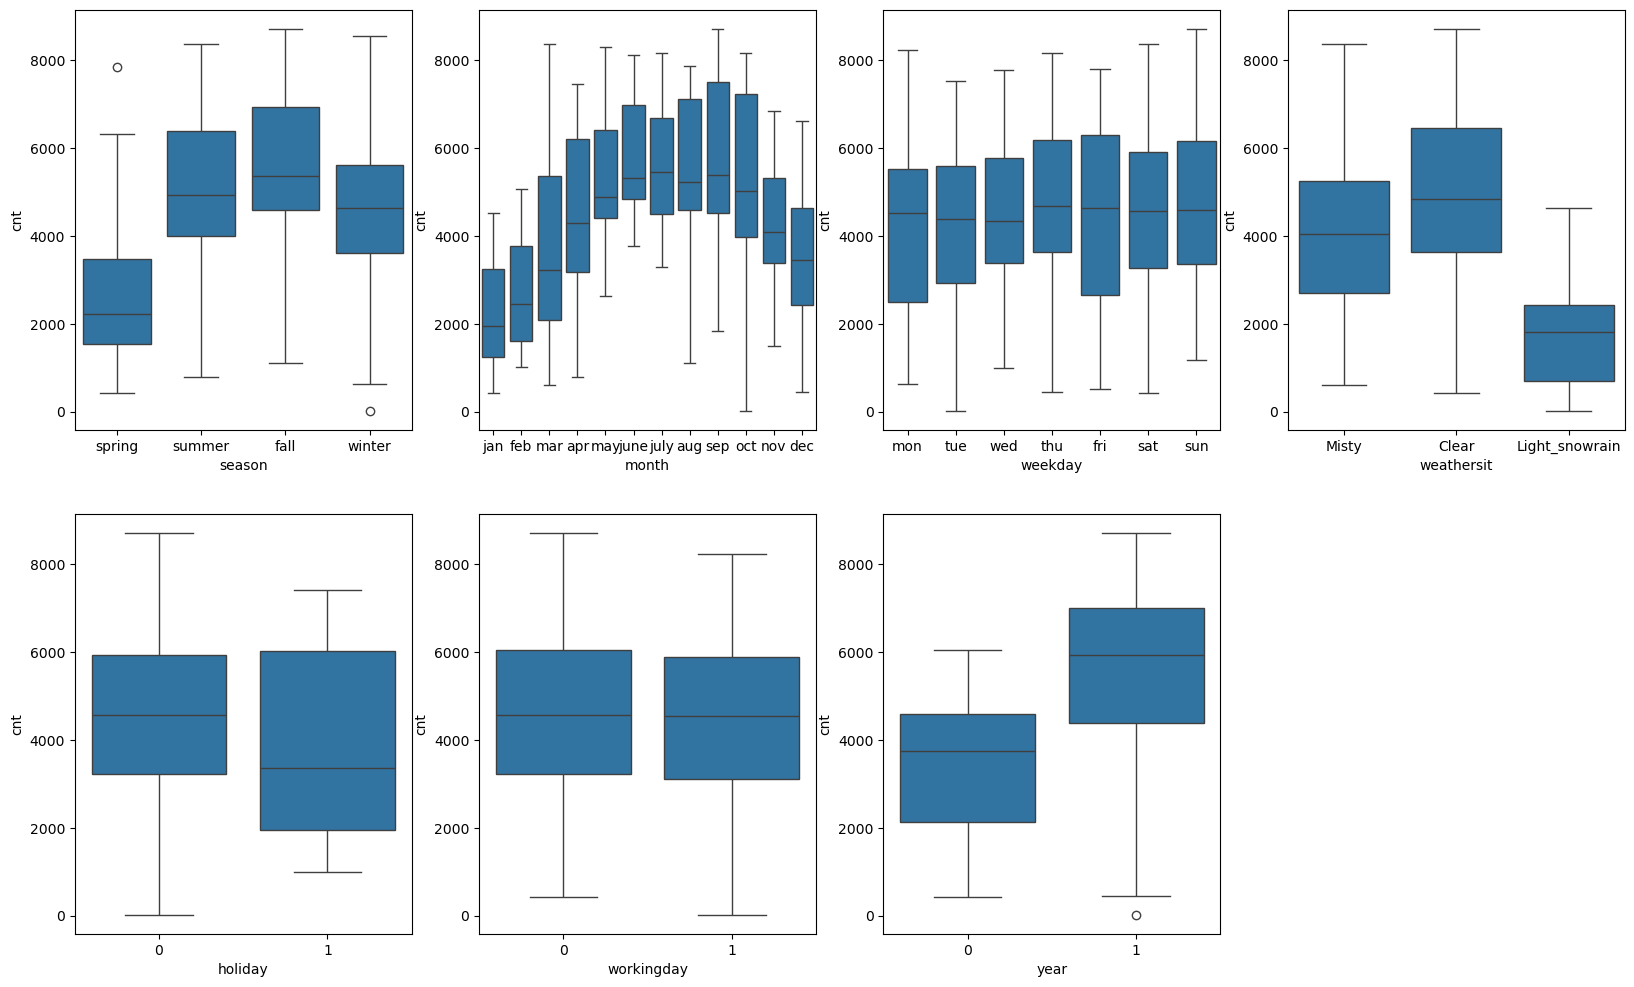

In [23]:

# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [24]:
# function to create barplot related to categorical columns

def plot_cat_columns(df, column):
    # Ensure 'year' is treated as a string for categorical plotting
    df['year'] = df['year'].astype(str)

    plt.figure(figsize=(12, 6))

    # First subplot: Barplot showing 'column' vs 'cnt'
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df)
    plt.title(f'Count by {column}')

    # Second subplot: Barplot showing 'column' vs 'cnt' with hue as 'year'
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=df, hue='year', palette='Set1')
    plt.title(f'Count by {column} and Year')
    plt.legend(title='Year', labels=['2018', '2019'])

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()



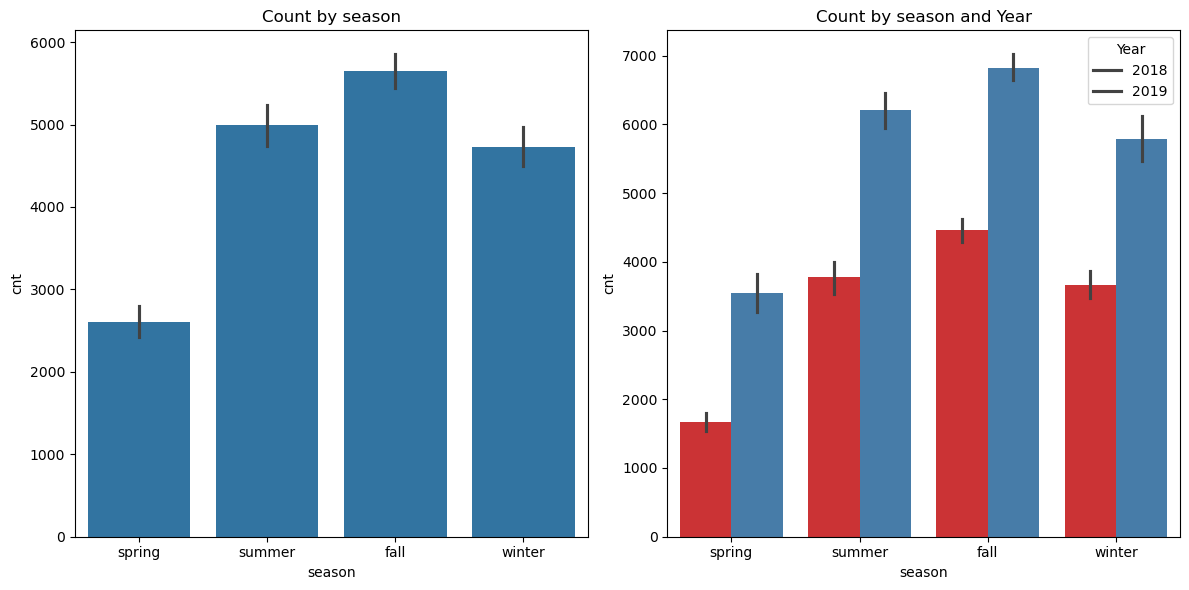

In [25]:

plot_cat_columns(df, 'season')

 Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

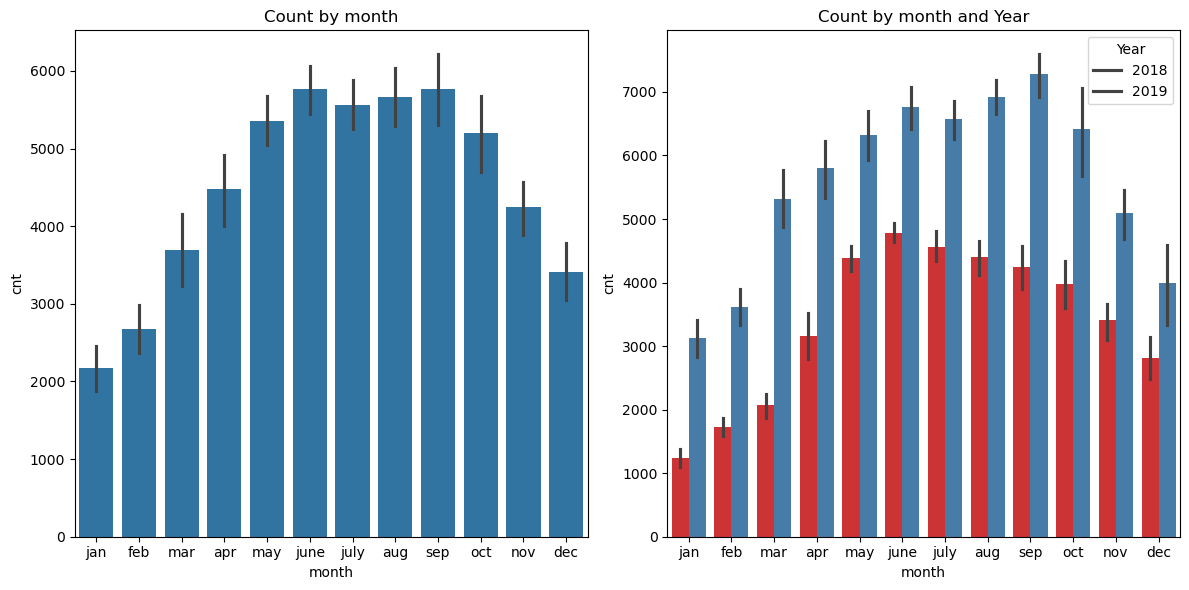

In [27]:

plot_cat_columns(df,'month')

 Most of the bookings has been done during the month of may, june, july, aug, sep and oct. 
 Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. 
 Number of booking for each month seems to have increased from 2018 to 2019.

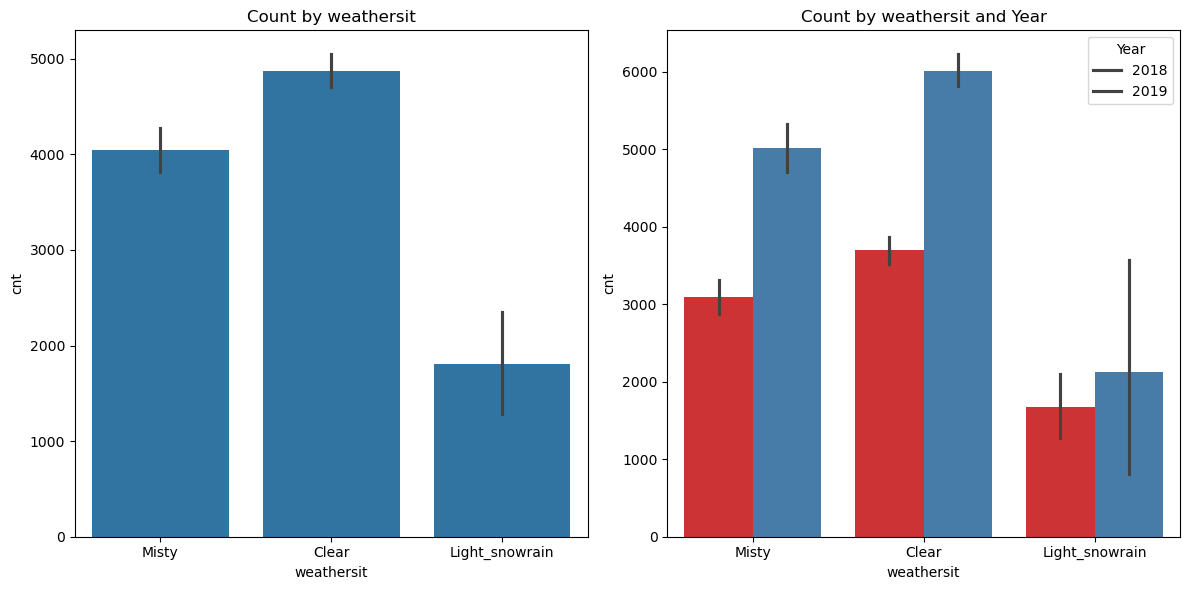

In [29]:

plot_cat_columns(df,'weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

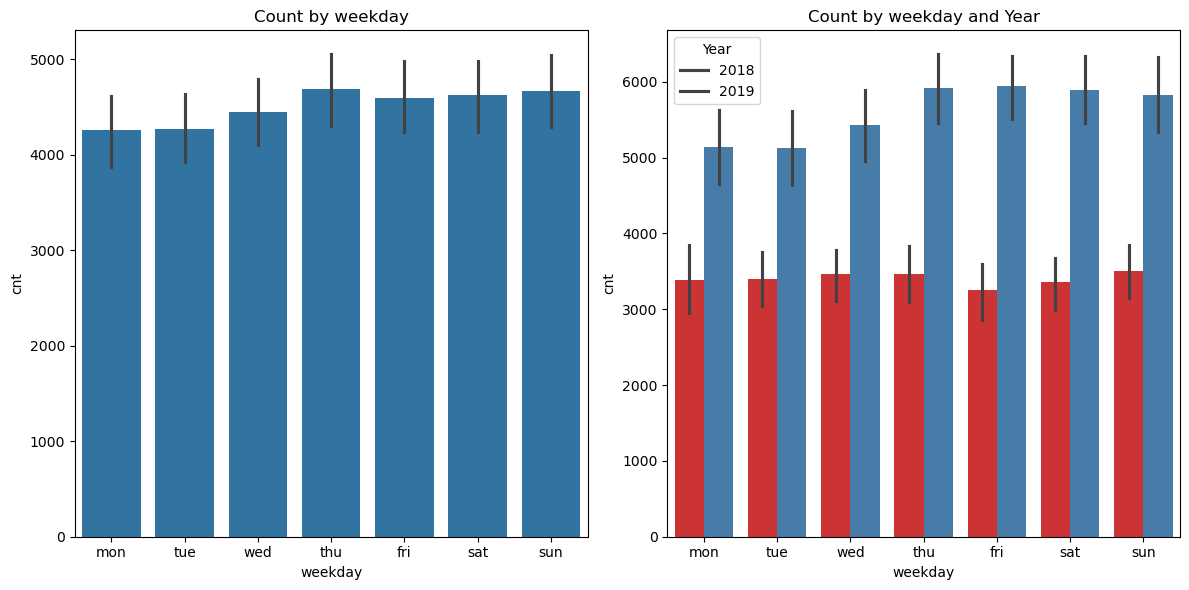

In [31]:

plot_cat_columns(df,'weekday')


 Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

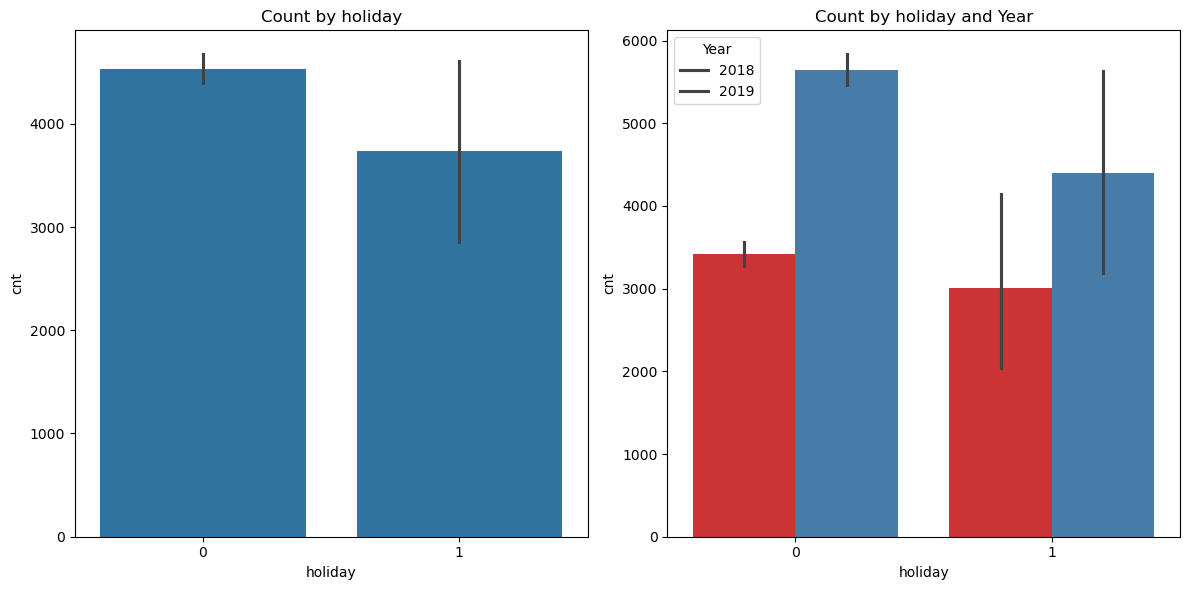

In [33]:

plot_cat_columns(df,'holiday')

 When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

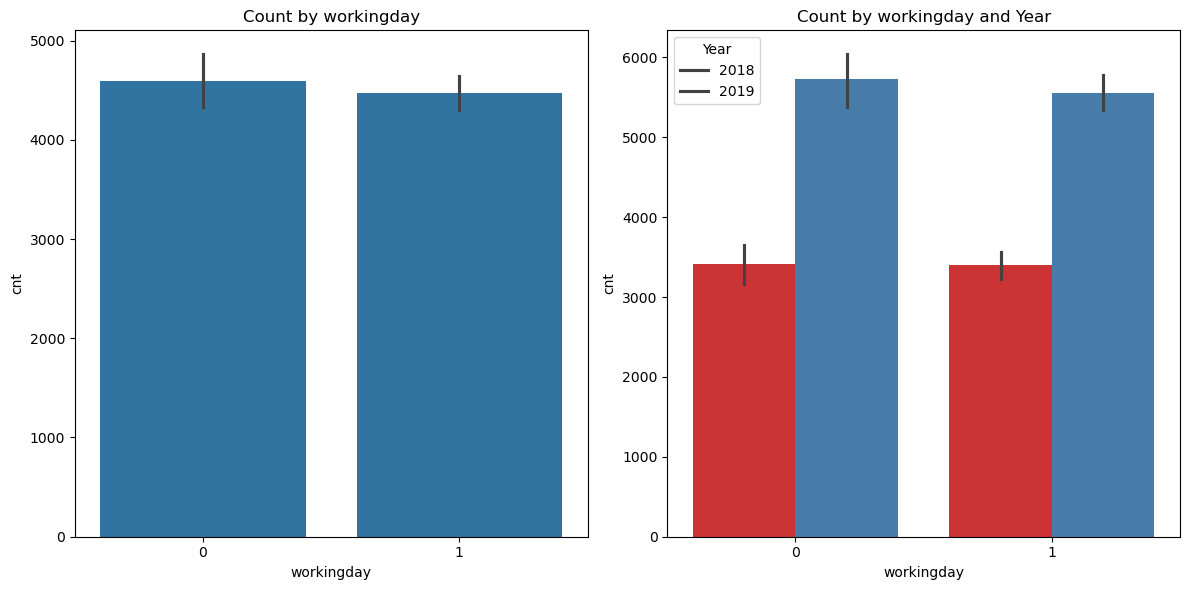

In [35]:

plot_cat_columns(df,'workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

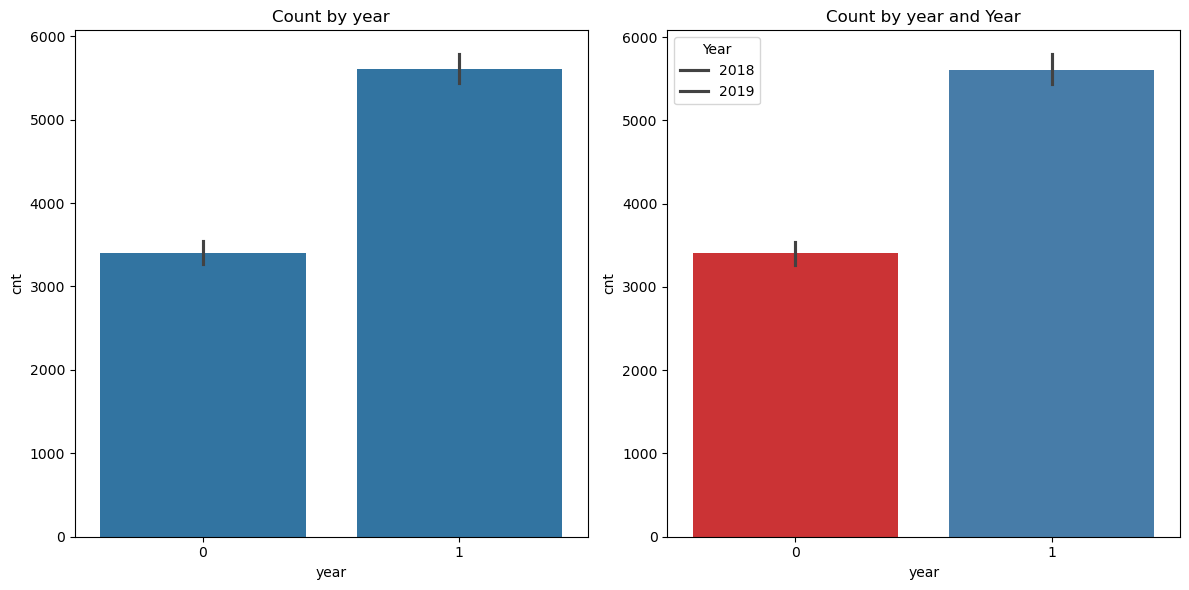

In [37]:

plot_cat_columns(df,'year')

 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

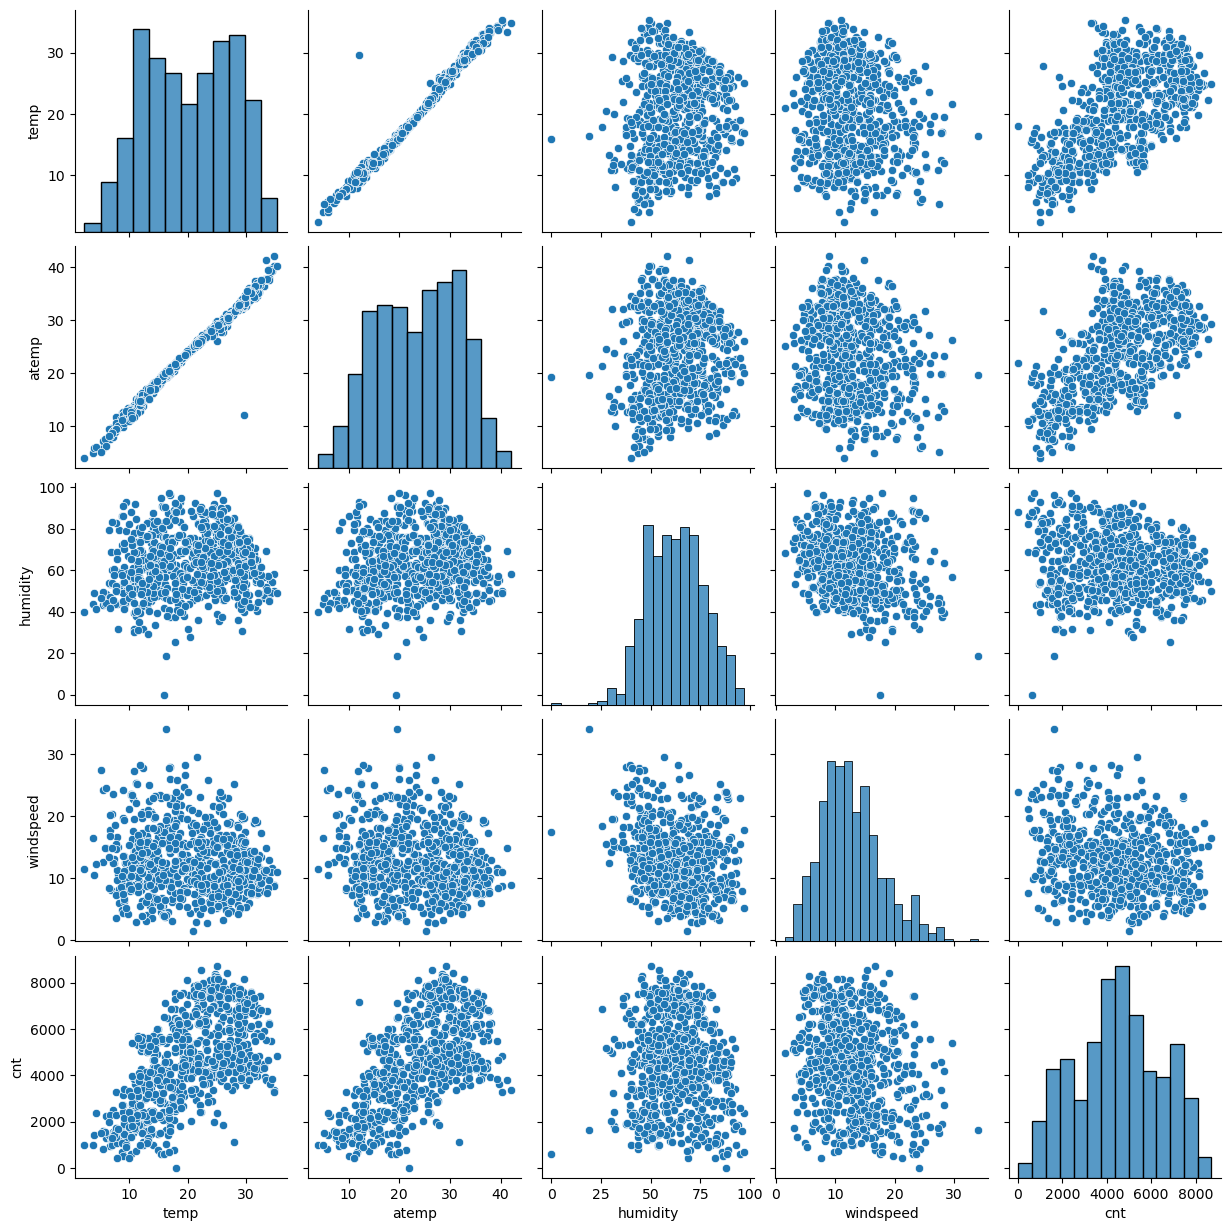

In [39]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()


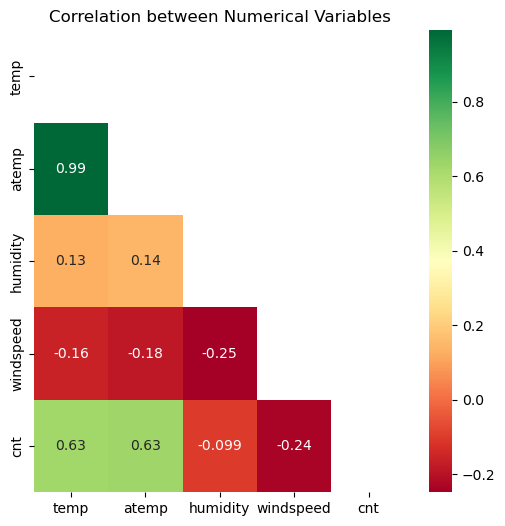

In [40]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Step 3 Data Preperation


In [43]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [44]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [45]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [46]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)



In [47]:
# Assuming df_new is your DataFrame

# Use pd.to_numeric to safely convert the columns to integers
# If there's a possibility of non-numeric values, you can use 'coerce' to set them as NaN
df_new = df_new.apply(pd.to_numeric, errors='coerce')

# If you want to fill NaN values with a default value (e.g., 0)
df_new = df_new.fillna(0).astype(int)

# Now you can safely convert the DataFrame to integers
print(df_new)

     season  year  month  holiday  weekday  workingday  weathersit  temp  \
0         0     0      0        0        0           1           0    14   
1         0     0      0        0        0           1           0    14   
2         0     0      0        0        0           1           0     8   
3         0     0      0        0        0           1           0     8   
4         0     0      0        0        0           1           0     9   
5         0     0      0        0        0           0           0     8   
6         0     0      0        0        0           0           0     8   
7         0     0      0        0        0           1           0     6   
8         0     0      0        0        0           1           0     5   
9         0     0      0        0        0           1           0     6   
10        0     0      0        0        0           1           0     6   
11        0     0      0        0        0           1           0     7   
12        0 

In [48]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,0,0,1,0,14,18,80,10,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,1,0,14,17,69,16,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,0,0,0,1,0,8,9,43,16,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,1,0,8,10,59,10,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,9,11,43,12,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   season          730 non-null    int32
 1   year            730 non-null    int32
 2   month           730 non-null    int32
 3   holiday         730 non-null    int32
 4   weekday         730 non-null    int32
 5   workingday      730 non-null    int32
 6   weathersit      730 non-null    int32
 7   temp            730 non-null    int32
 8   atemp           730 non-null    int32
 9   humidity        730 non-null    int32
 10  windspeed       730 non-null    int32
 11  cnt             730 non-null    int32
 12  aug             730 non-null    int32
 13  dec             730 non-null    int32
 14  feb             730 non-null    int32
 15  jan             730 non-null    int32
 16  july            730 non-null    int32
 17  june            730 non-null    int32
 18  mar             730 non-null  

In [50]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [51]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14,18,80,10,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14,17,69,16,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8,9,43,16,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8,10,59,10,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9,11,43,12,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
df_new.shape

(730, 30)

In [53]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   year            730 non-null    int32
 1   holiday         730 non-null    int32
 2   workingday      730 non-null    int32
 3   temp            730 non-null    int32
 4   atemp           730 non-null    int32
 5   humidity        730 non-null    int32
 6   windspeed       730 non-null    int32
 7   cnt             730 non-null    int32
 8   aug             730 non-null    int32
 9   dec             730 non-null    int32
 10  feb             730 non-null    int32
 11  jan             730 non-null    int32
 12  july            730 non-null    int32
 13  june            730 non-null    int32
 14  mar             730 non-null    int32
 15  may             730 non-null    int32
 16  nov             730 non-null    int32
 17  oct             730 non-null    int32
 18  sep             730 non-null  

# Step 4 Splitting the Data into Training and Testing Sets

In [55]:
# splitting the dataframe into Train and Test
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [56]:
# check the shape of training datatset
df_train.shape


(510, 30)

In [57]:
# check the shape of testing datatset
df_test.shape

(220, 30)

In [58]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [59]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29,33,70,11,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16,20,62,10,4066,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10,11,48,23,1796,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15,18,48,8,4220,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13,16,72,14,1683,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [60]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [61]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.818182,0.769231,0.721649,0.28125,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.424242,0.435897,0.639175,0.25000,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.242424,0.205128,0.494845,0.65625,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.393939,0.384615,0.494845,0.18750,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.333333,0.333333,0.742268,0.37500,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [62]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.533571,0.512217,0.645826,0.322917,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225145,0.207737,0.145867,0.165495,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.333333,0.536082,0.218750,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.538462,0.649485,0.312500,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.406250,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


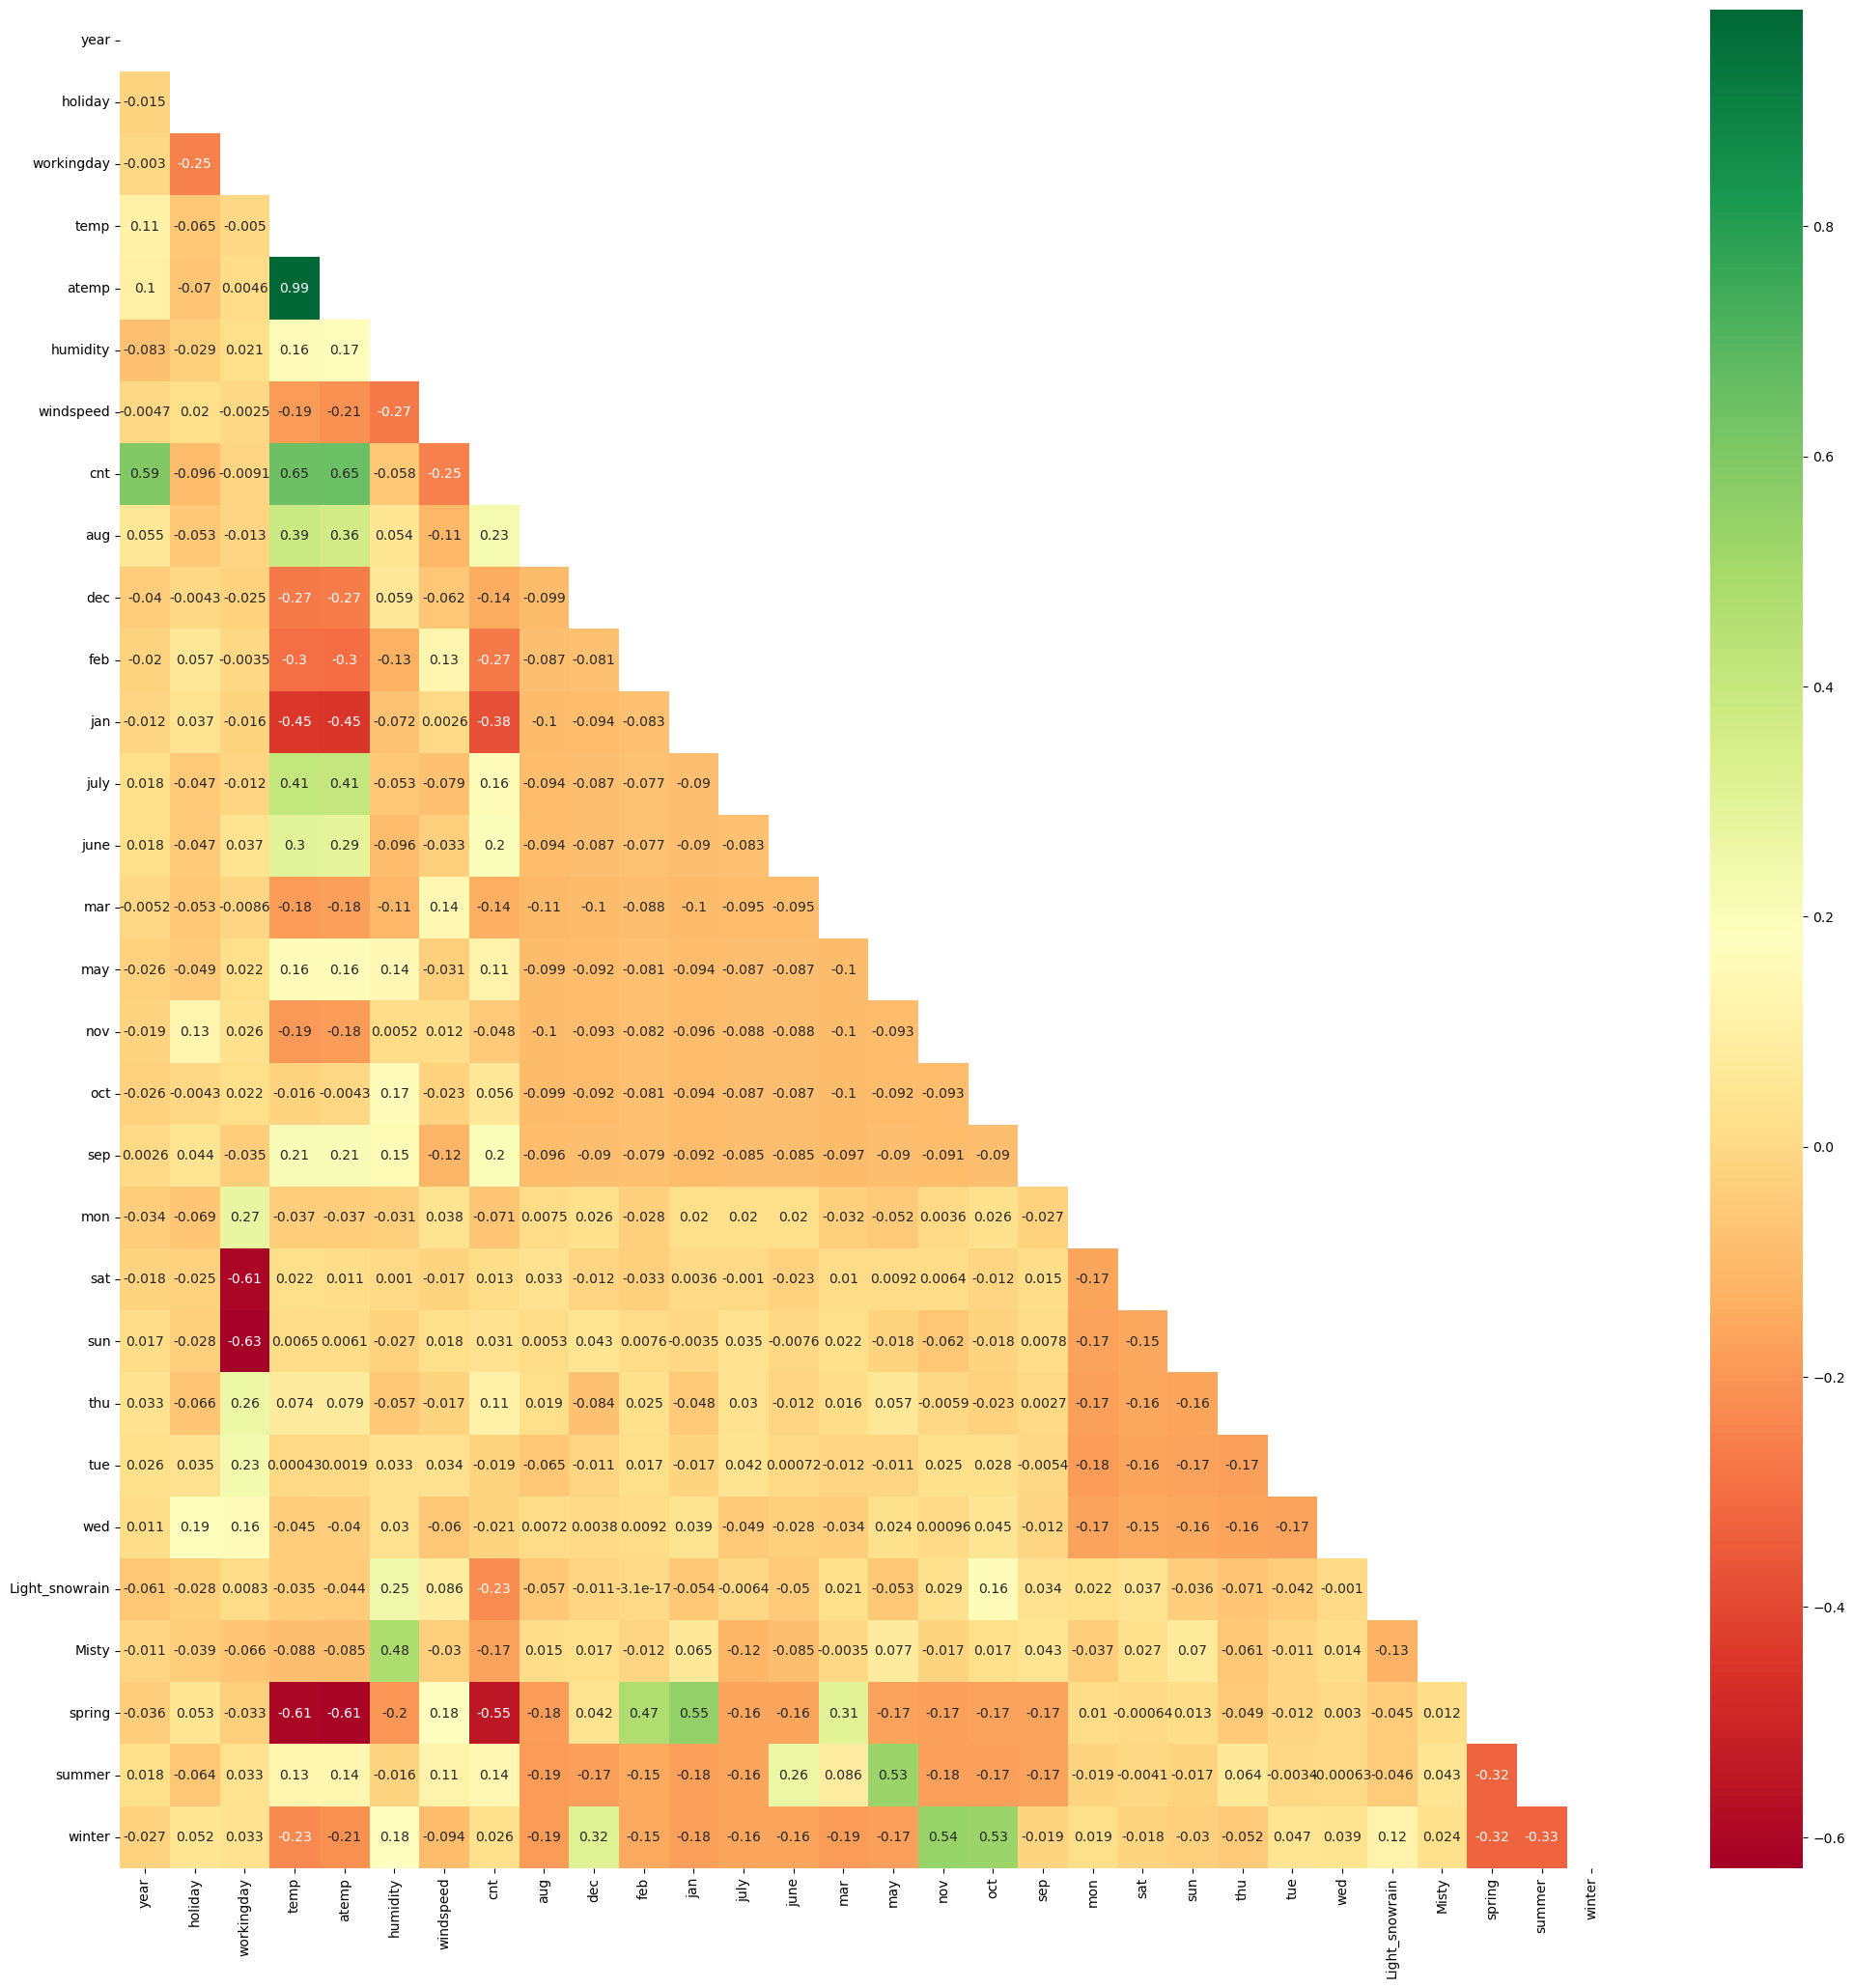

In [63]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

CNT appears to be correlated with both temperature and year variable. Likewise, there is a correlation between humidity and misty. There is a strong association between the months of January and February for the spring season, May for the summer season, and October and November for the winter season.

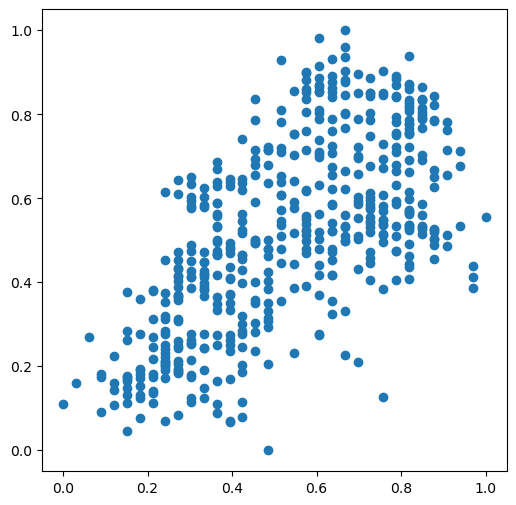

In [65]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

positive correlation between temp and cnt.

In [67]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [68]:
lm = LinearRegression()

# Initialize RFE with the model and number of features to select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE to the training data
rfe = rfe.fit(X_train, y_train)

In [69]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 13),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1)]

In [70]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'dec',
       'jan', 'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')


In [71]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [72]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [73]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [74]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,atemp,319.99
2,temp,311.07
4,humidity,25.31
5,windspeed,4.26
14,winter,3.01
13,spring,2.95
12,Misty,2.28
0,year,2.07
9,nov,1.84
7,jan,1.75


Humidity,temp,atemp has very high VIF Value

 # Step 5: Building a linear model

In [150]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          5.03e-187
Time:                        21:00:37   Log-Likelihood:                 509.91
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     494   BIC:                            -920.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3678      0.032     11.

In [152]:
# As humidity,temp,atemp shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity','temp','atemp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,2.68
11,winter,2.54
10,spring,2.30
6,nov,1.80
0,year,1.77
4,jan,1.64
9,Misty,1.47
3,dec,1.46
7,sep,1.12
5,july,1.11


# VIF seems to be good

In [155]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     153.4
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          1.91e-158
Time:                        21:02:05   Log-Likelihood:                 433.79
No. Observations:                 510   AIC:                            -841.6
Df Residuals:                     497   BIC:                            -786.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5701      0.014     41.

In [157]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,2.67
9,spring,2.30
0,year,1.77
10,winter,1.64
4,jan,1.63
8,Misty,1.47
3,dec,1.29
5,july,1.11
6,sep,1.10
7,Light_snowrain,1.08


In [159]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.5
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          2.40e-155
Time:                        21:03:13   Log-Likelihood:                 423.78
No. Observations:                 510   AIC:                            -823.6
Df Residuals:                     498   BIC:                            -772.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5696      0.014     41.

In [161]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,2.66
8,spring,2.18
0,year,1.77
3,jan,1.59
7,Misty,1.46
9,winter,1.39
4,july,1.11
5,sep,1.10
6,Light_snowrain,1.08
1,holiday,1.04


In [163]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     168.4
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          7.29e-153
Time:                        21:03:39   Log-Likelihood:                 415.23
No. Observations:                 510   AIC:                            -808.5
Df Residuals:                     499   BIC:                            -761.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5652      0.014     40.

In [165]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,2.64
0,year,1.77
7,spring,1.54
6,Misty,1.45
8,winter,1.39
3,july,1.11
4,sep,1.10
5,Light_snowrain,1.08
1,holiday,1.04


In [167]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     175.7
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          1.19e-148
Time:                        21:04:19   Log-Likelihood:                 402.59
No. Observations:                 510   AIC:                            -785.2
Df Residuals:                     500   BIC:                            -742.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5611      0.014     39.

In [169]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,2.54
0,year,1.74
6,spring,1.50
5,Misty,1.45
7,winter,1.36
3,sep,1.09
4,Light_snowrain,1.08
1,holiday,1.04


In [171]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          1.13e-149
Time:                        21:05:06   Log-Likelihood:                 402.25
No. Observations:                 510   AIC:                            -786.5
Df Residuals:                     501   BIC:                            -748.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5647      0.014     41.

Since there appears to be very little multicolinearity across the predictors and significant p-values for each predictor, we may have a look at the aforementioned model, or lr_6.
The total model is significant, according to the p-value of 1.47e-186, or nearly equal to zero, and the F-Statistics value of 248.4, which is larger than 1.


In [174]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.564658
year              0.247452
holiday          -0.099871
windspeed        -0.189562
sep               0.093010
Light_snowrain   -0.295498
Misty            -0.091850
spring           -0.273683
winter           -0.055099
dtype: float64

# Step 6 Residual Analysis of the train data

In [177]:
X_train_lm_6

,const,year,holiday,windspeed,sep,Light_snowrain,Misty,spring,winter
576,1.0,1,0,0.28125,0,0,0,0,0
426,1.0,1,0,0.25000,0,0,1,1,0
728,1.0,1,0,0.65625,0,0,0,1,0
482,1.0,1,0,0.18750,0,0,1,0,0
111,1.0,0,0,0.37500,0,0,1,0,0
580,1.0,1,0,0.46875,0,0,0,0,0
500,1.0,1,0,0.18750,0,0,0,0,0
479,1.0,1,0,0.15625,0,0,0,0,0
472,1.0,1,0,0.28125,0,0,1,0,0
455,1.0,1,0,0.28125,0,0,1,0,0


In [179]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

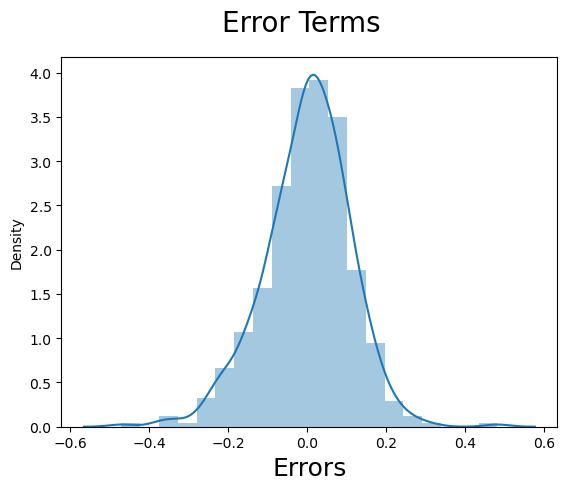

In [181]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

# Multi Colinearity

In [184]:
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,2.54
0,year,1.74
6,spring,1.50
5,Misty,1.45
7,winter,1.36
3,sep,1.09
4,Light_snowrain,1.08
1,holiday,1.04


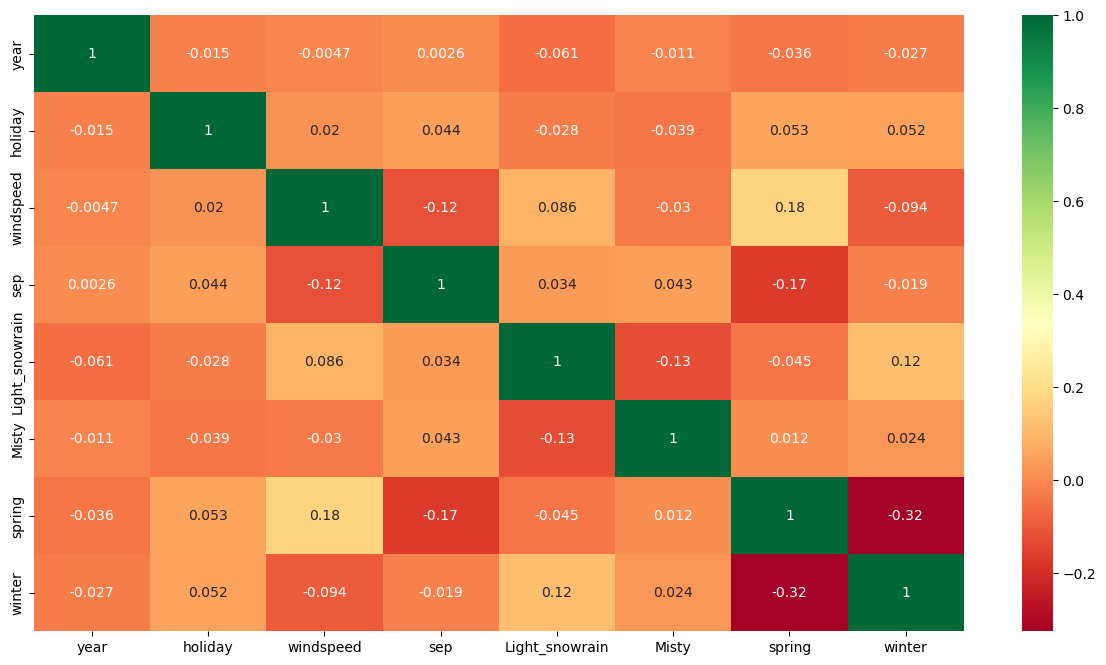

In [186]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 & also there is no multicolinearity as seen from the heatmap.

# Making Predictions

In [193]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.818182,0.769231,0.649485,0.09375,0.692706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.909091,0.846154,0.608247,0.15625,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.515152,0.487179,0.835052,0.34375,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.878788,0.794872,0.432990,0.34375,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.818182,0.743590,0.309278,0.53125,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [195]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.553857,0.532634,0.633646,0.315625,0.522154,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.232754,0.212565,0.148671,0.154914,0.219163,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.030303,0.025641,0.257732,-0.031250,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.358974,0.523196,0.218750,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545455,0.538462,0.618557,0.312500,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757576,0.717949,0.742268,0.406250,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.969697,0.974359,1.000000,0.781250,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
y_test = df_test.pop('cnt')
X_test = df_test

In [199]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [201]:
y_pred = lr_6.predict(X_test_lm_6)

In [203]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7375

# Step 8: Model Evaluation
Plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

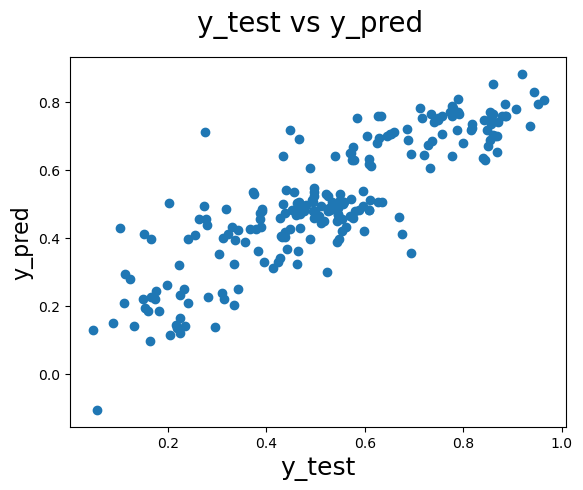

In [206]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [208]:
round(lr_6.params,4)

const             0.5647
year              0.2475
holiday          -0.0999
windspeed        -0.1896
sep               0.0930
Light_snowrain   -0.2955
Misty            -0.0918
spring           -0.2737
winter           -0.0551
dtype: float64

In [210]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7276


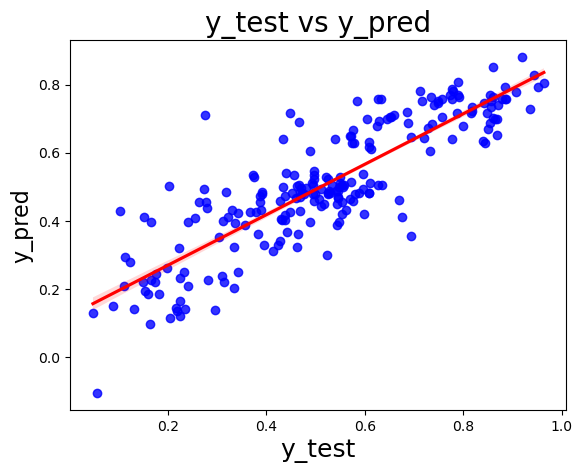

In [212]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparison of the datasets used for training and testing:
R^2 for the train dataset is 0.833.
R^2 for the test dataset is 0.8038.

Adjusted R^2 for the train dataset: 0.829    
Adjusted R^2 for the test dataset: 0.7944
Year, holiday, temperature, wind speed, September, light snow, mist, spring, summer, and winter all affect bike demand.